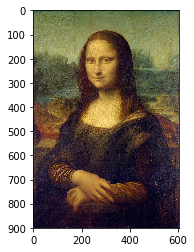

In [2]:
#a)
%matplotlib inline
#a Mona Lisa image
import numpy as np
import matplotlib.pyplot as plt

mona  = plt.imread('/Users/joanneloh/Documents/Applied Machine Learning/Hmrk 4/mona-lisa-small.jpg')
plt.imshow(mona)

In [3]:
#b) preprocessing: We don't need to use preprocessing methods for this dataset. 
#This is because Random Forests are robust to outliers and this decision tree does not get affected 
#by the data which are coordinates and we are not calculating distances.
#we are uniformly sampling 5000 random (x,y) coordinates

x_values = np.random.choice(900, 5000)
y_values = np.random.choice(604, 5000)

print (x_values.size)
print (y_values.size)

5000
5000


In [4]:
training_coordinates = [] 
rbg = []

for i in range(5000):
    y = y_values[i]
    x = x_values[i]
    training_coordinates.append([x, y])
    rbg.append(mona[x][y])

training_coordinates = np.array(training_coordinates)
rbg = np.array(rbg)
# print(training_coordinates.shape)
# print(rbg.shape)
print(training_coordinates[1])
    
    


[409 200]


In [5]:
#c we uniformly sampled the pixel values at each of the coordinate locations. now we are scaling it to between 0-1
#preprocessing for outputs: regress three at once?
rbg = [pixel/255 for pixel in rbg]


In [6]:
from sklearn.ensemble import RandomForestRegressor
i = mona.shape[0]
j = mona.shape[1]

In [7]:
#d building the final image
def randomForest(n, depth):
    rfPred = RandomForestRegressor(n_estimators = n, max_depth = depth)
    rfPred.fit(training_coordinates, rbg)
    #approximating size of original image
    pred = np.zeros([i, j, 3])
    for x in range(i):
        for y in range(j):
            #feed the pixel coordinate through the
            #random forest and color the resulting pixel with the output prediction
            coor = [x, y]
            pred[x,y] = rfPred.predict(np.array(coor).reshape(1, -1))
      
    return pred
    
            
    
    

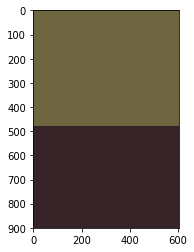

In [10]:
#e i) depths 1, 2, 3, 5, 10, and 15
depth1 = randomForest(1, 1)
plt.imshow(depth1)
plt.show()


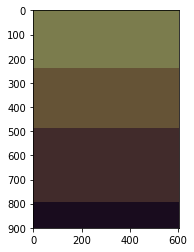

In [11]:
depth2 = randomForest(1, 2)
plt.imshow(depth2)
plt.show()

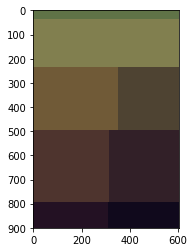

In [12]:
depth3 = randomForest(1, 3)
plt.imshow(depth3)
plt.show()

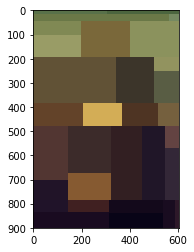

In [13]:
depth5 = randomForest(1, 5)
plt.imshow(depth5)
plt.show()

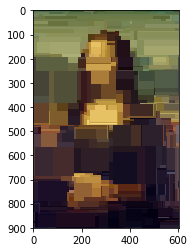

In [14]:
depth10 = randomForest(1, 10)
plt.imshow(depth10)
plt.show()

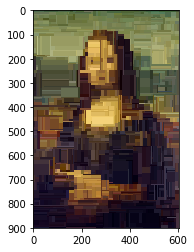

In [15]:
depth15 = randomForest(1, 15)
plt.imshow(depth15)
plt.show()

In [ ]:
#as the depth increases, the image predicted becomes closer to the original image. This is because the deeper the tree, 
#the more splits it has and captures more information about the data. For example, when depth = 1, only two colors are shown
#because the tree only has a limited number of subspaces to be divided into. However, we can imagine that at really large
#depths, there will be risks of overfitting the data.

In [ ]:
#e ii) random forest of depth 7, number of trees equal to 1, 3, 5, 10, and 100.

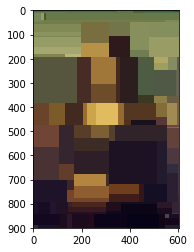

In [17]:
tree1 = randomForest(1, 7)
plt.imshow(tree1)
plt.show()

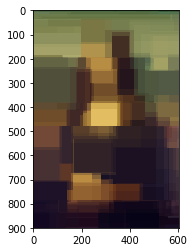

In [18]:
tree3 = randomForest(3, 7)
plt.imshow(tree3)
plt.show()

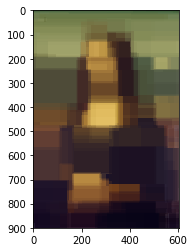

In [19]:
tree5 = randomForest(5, 7)
plt.imshow(tree5)
plt.show()

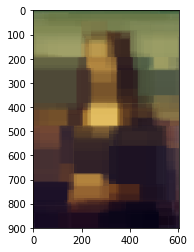

In [20]:
tree10 = randomForest(10, 7)
plt.imshow(tree10)
plt.show()

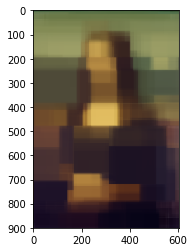

In [21]:
tree100 = randomForest(100, 7)
plt.imshow(tree100)
plt.show()

In [ ]:
#as the number of trees increase, the image predicted becomes closer to the original image. It seems that the 
# image is becoming smoother in terms of the boundary of color. This is because the Random Forest takes the average of
# each tree predictions, so there is less variance and higher accuracy. However, we think that having too many trees
# will slow down the training process. (eg, it took forever to run on my laptop for 100 trees)

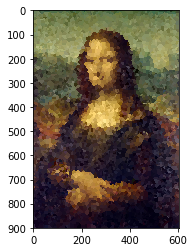

In [22]:
#e iii) KNN with k =1 
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=1)
neigh.fit(training_coordinates, rbg)
pred = np.zeros([i, j, 3])
for x in range(i):
    for y in range(j):
        #feed the pixel coordinate through the
        #random forest and color the resulting pixel with the output prediction
        coor = [x, y]
        pred[x,y] = neigh.predict(np.array(coor).reshape(1, -1))

plt.imshow(pred)
plt.show()


In [ ]:
#this looks the way it does because in KNN, each pixel color is classified to it's closest neighbor and the boundary 
#between each pixel is not smooth or somewhat circular. In the random forest, the subspaces are rectangular, so the clusters seem to have
# a rectangular patch of color. 

In [ ]:
#e iv) we chose not to prune the tree becaue it would not add much extra benefit. In random forests, data is bootstrapped 
# and we need not be too concerned with overfitting. https://machinelearningmastery.com/bagging-and-random-forest-ensemble-algorithms-for-machine-learning/